In [ ]:
import os
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np

from plot_settings import define_plot_settings

project_dir = os.path.abspath('..')
print(f"Project directory: {project_dir}")
sys.path.append(os.path.join(project_dir))

Project directory: /work3/mtaho/PhD/DeepLearning/DeepLearning_PAINN


## Training history

Load training history data

In [55]:
relative_path = 'runs/train/20241119_0751'

data_path = f"{project_dir}/{relative_path}/data.pickle"

with open(data_path, 'rb') as f:
    data = pickle.load(f)

for key in data:
    data[key] = np.array(data[key])

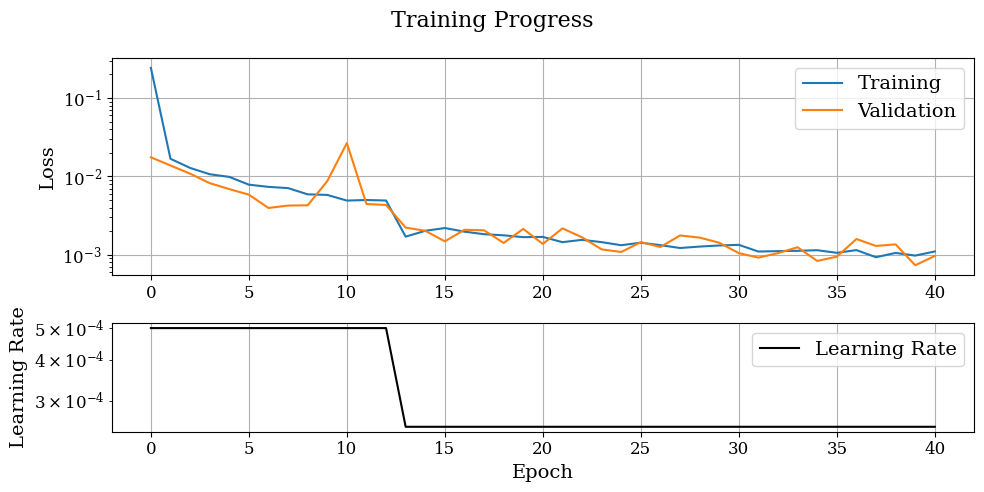

In [56]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), height_ratios=[1, 0.5])

define_plot_settings(14)

# Plot primary y-axis (losses) on the first subplot
ax1.semilogy(data['epoch'], data['train_loss'],'-', label='Training')
ax1.semilogy(data['epoch'], data['val_loss'],'-', label='Validation')
# ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')  # Legend for the first y-axis
ax1.grid(True)

# Plot secondary y-axis (learning rate) on the second subplot
ax2.semilogy(data['epoch'], data['lr'], 'k-', label='Learning Rate')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Learning Rate', color='k')
ax2.tick_params(axis='y', labelcolor='k')
ax2.legend(loc='upper right')  # Combine legends
ax2.grid(True)

plt.suptitle('Training Progress')
fig.tight_layout()

## Trained model 

Load trained model

In [ ]:
from src.models import model_loader
checkpoint_path = f"{project_dir}/examples/model_checkpoint.pth"

painn, metadata = model_loader.load_checkpoint(checkpoint_path);

print(painn)


ImportError: attempted relative import with no known parent package